In [158]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## astype可以显示修改ndarray的数据类型

In [159]:
data1=np.array([[1,2,3],[3,2,1]])

In [160]:
data1.dtype

dtype('int64')

In [161]:
data64 = data1.astype(np.float64)
data64.dtype

dtype('float64')

以上命令将一个int64类型数组转换为了float64,字符串也可以转换为数值类型

In [162]:
data=np.array([['1.2','2.32434','3'],['3','2','1']],dtype=np.string_)
data.dtype

dtype('S7')

In [163]:
data2=data.astype(np.float16)

## 数组与标量的运算,同维度数组的运算

In [164]:
data64*data2

array([[ 1.20019531,  4.6484375 ,  9.        ],
       [ 9.        ,  4.        ,  1.        ]])

In [165]:
data64*10

array([[ 10.,  20.,  30.],
       [ 30.,  20.,  10.]])

In [166]:
1/data64

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.33333333,  0.5       ,  1.        ]])

不同大小的数组的计算叫做广播,后面会有介绍.

## 基本索引和切片

下面是一维数组的情况

In [167]:
arr = np.arange(10)
arr[5]

5

In [168]:
arr[5:8]

array([5, 6, 7])

对某一片段赋值会改变片段中所有元素

In [169]:
arr[5:8]=11

In [170]:
arr

array([ 0,  1,  2,  3,  4, 11, 11, 11,  8,  9])

而且切片时时原始数组的视图,即使切片赋给了一个新变量,对这个变量的修改会改变原数组

In [171]:
slice=arr[5:8]
slice[1]=234
arr

array([  0,   1,   2,   3,   4,  11, 234,  11,   8,   9])

In [172]:
slice[:]=23
arr

array([ 0,  1,  2,  3,  4, 23, 23, 23,  8,  9])

可以使用arr.copy()函数复制一份真正的副本

In [173]:
slice=arr[5:8].copy()
slice[:]=12
arr

array([ 0,  1,  2,  3,  4, 23, 23, 23,  8,  9])

对于高维数组,索引为数组,对于二维,索引为一维,本质上还是递归访问,先访问较高维度,再逐步向低维访问.

In [174]:
arr=np.array([[1,2,3],[3.4,3.7,2.5]])
arr[1][1]

3.7000000000000002

In [175]:
arr[1,1]

3.7000000000000002

In [176]:
arr[1]

array([ 3.4,  3.7,  2.5])

这里对切片不做举例,还是按照递归访问的原则进行.update:还是举几个吧.

In [177]:
arr[:,1:]

array([[ 2. ,  3. ],
       [ 3.7,  2.5]])

In [178]:
arr[:,:1]

array([[ 1. ],
       [ 3.4]])

In [179]:
arr[:,0]#这里要跟上面区分

array([ 1. ,  3.4])

In [180]:
arr[0] #z这里要和上面的命令区分

array([ 1.,  2.,  3.])

In [181]:
arr[0,1:] #还有这种

array([ 2.,  3.])

### 布尔型索引及应用

In [182]:
names=np.array(['bob','uiu','will','joe','joe','will','bob'])
data = np.random.randn(7,4)  #创建7*4的随机值数组
data

array([[-0.97123462,  1.28637631, -0.44986337,  0.05309102],
       [-1.68444708, -0.86989037, -0.03069891, -0.13722115],
       [ 1.1339594 , -0.23741608,  0.68270187,  0.26304842],
       [-1.89873229, -1.13496634, -1.32041969,  1.1703535 ],
       [-0.37391628,  0.65385774, -1.17680462, -1.40834522],
       [ 0.57775003, -0.36028391,  1.11560613,  0.49936754],
       [-1.0625333 ,  1.8468698 , -1.26522974, -0.33432899]])

数组不光可以和标量做算术计算,也可以做比较运算.

In [183]:
names =='bob'

array([ True, False, False, False, False, False,  True], dtype=bool)

布尔型数组可以用来做数组索引,有点像filter函数

In [184]:
data[names=='bob']

array([[-0.97123462,  1.28637631, -0.44986337,  0.05309102],
       [-1.0625333 ,  1.8468698 , -1.26522974, -0.33432899]])

In [185]:
data[names=='bob',:2]

array([[-0.97123462,  1.28637631],
       [-1.0625333 ,  1.8468698 ]])

In [186]:
data[names=='bob',2]

array([-0.44986337, -1.26522974])

选择不是bob的元素,可以用!=,或者用'~'变化逻辑关系

In [187]:
data[~(names=='bob'),2]

array([-0.03069891,  0.68270187, -1.32041969, -1.17680462,  1.11560613])

还可以由&,|的布尔运算符组合条件,另外python中的and 和or在布尔数组中无效.

In [188]:
mask=(names=='bob')|(names=='joe')
mask

array([ True, False, False,  True,  True, False,  True], dtype=bool)

In [189]:
data[mask,:]

array([[-0.97123462,  1.28637631, -0.44986337,  0.05309102],
       [-1.89873229, -1.13496634, -1.32041969,  1.1703535 ],
       [-0.37391628,  0.65385774, -1.17680462, -1.40834522],
       [-1.0625333 ,  1.8468698 , -1.26522974, -0.33432899]])

赋值更加高效

In [190]:
data[data<0]=0
data

array([[ 0.        ,  1.28637631,  0.        ,  0.05309102],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.1339594 ,  0.        ,  0.68270187,  0.26304842],
       [ 0.        ,  0.        ,  0.        ,  1.1703535 ],
       [ 0.        ,  0.65385774,  0.        ,  0.        ],
       [ 0.57775003,  0.        ,  1.11560613,  0.49936754],
       [ 0.        ,  1.8468698 ,  0.        ,  0.        ]])

In [191]:
np.empty_like((3,4))

array([0, 0])

#### 花式索引

In [192]:
arr = np.empty((8,4))

In [193]:
for i in range(8):
    arr[i]=i

In [194]:
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [195]:
arr[[1,3,0,2]]

array([[ 1.,  1.,  1.,  1.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 2.,  2.,  2.,  2.]])

In [196]:
arr[[-2,-4,-1,-3]]

array([[ 6.,  6.,  6.,  6.],
       [ 4.,  4.,  4.,  4.],
       [ 7.,  7.,  7.,  7.],
       [ 5.,  5.,  5.,  5.]])

In [197]:
arr=np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [198]:
arr[[1,0,3,2],[3,1,2,0]]

array([ 7,  1, 14,  8])

In [199]:
arr[[1,0,3,2]][:,[3,1,2,0]]

array([[ 7,  5,  6,  4],
       [ 3,  1,  2,  0],
       [15, 13, 14, 12],
       [11,  9, 10,  8]])

In [200]:
arr[[1,0,3,2]]

array([[ 4,  5,  6,  7],
       [ 0,  1,  2,  3],
       [12, 13, 14, 15],
       [ 8,  9, 10, 11]])

花式索引出来的数据是原数据的一个复制.

In [201]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

#### 数组的转置

In [202]:
arr.T

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [203]:
arr.transpose((2,1,0))

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [204]:
arr.transpose((1,2,0)) # 0,1,2代表着数组的3个轴,transpose的作用其实就是交换数组的轴

array([[[ 0,  8],
        [ 1,  9],
        [ 2, 10],
        [ 3, 11]],

       [[ 4, 12],
        [ 5, 13],
        [ 6, 14],
        [ 7, 15]]])

In [205]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [206]:
arr.transpose((1,0,2)).transpose((0,2,1)) 
#两个相邻轴的交换比较好理解,不相邻轴可以用两个变换等效过来,这样会比较好理解,但依然很难理解

array([[[ 0,  8],
        [ 1,  9],
        [ 2, 10],
        [ 3, 11]],

       [[ 4, 12],
        [ 5, 13],
        [ 6, 14],
        [ 7, 15]]])

In [207]:
-arr

array([[[  0,  -1,  -2,  -3],
        [ -4,  -5,  -6,  -7]],

       [[ -8,  -9, -10, -11],
        [-12, -13, -14, -15]]])

In [208]:
np.logical_not(arr)

array([[[ True, False, False, False],
        [False, False, False, False]],

       [[False, False, False, False],
        [False, False, False, False]]], dtype=bool)

## 利用数组进行数据处理

In [209]:
points = np.arange(-5,5,0.01)
xs,ys = np.meshgrid(points,points)

In [210]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ..., 
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [211]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [212]:
z = np.sqrt(xs**2+ys**2)

In [213]:
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

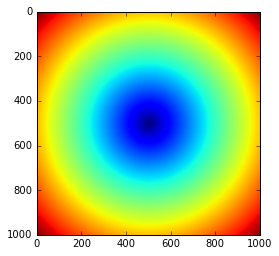

In [214]:
plt.imshow(z)

In [215]:
plt.show()

## 将条件逻辑表述为数组运算

In [216]:
xarry = np.array([1.1,2.2,1.3,1.4,1.6])
yarry = np.array([2.1,2.2,2.3,2.4,2.6])
cond = np.array([True,False,True,True,False])
np.where(cond,xarry,yarry)

array([ 1.1,  2.2,  1.3,  1.4,  2.6])

In [217]:
arr = np.random.randn(4,4)
np.where(arr>0,2,arr)

array([[-0.86598128, -1.80806324, -1.41969975,  2.        ],
       [ 2.        , -0.9300642 , -0.65793805,  2.        ],
       [ 2.        , -0.36147418,  2.        , -0.2661552 ],
       [ 2.        , -0.70168736, -0.58130519, -1.99894005]])

In [218]:
np.where(arr>0,2,-2)

array([[-2, -2, -2,  2],
       [ 2, -2, -2,  2],
       [ 2, -2,  2, -2],
       [ 2, -2, -2, -2]])

## 数学和统计方法

可以通过数学函数对整个数组或者某一轴的数据进行统计

In [219]:
arr = np.random.randn(5,4)

In [220]:
arr

array([[-0.53703714, -0.26359877, -1.67093805, -0.58940599],
       [-0.18336376,  0.04836549,  1.89517675,  0.59951896],
       [ 1.83752895, -1.25256946, -1.17585861, -2.04857042],
       [-2.17630725, -1.36814318,  0.9620335 , -2.08301881],
       [ 0.70653827,  1.04208277, -0.68265354,  0.08531916]])

In [221]:
arr.mean()

-0.34274505677636541

In [222]:
np.mean(arr)

-0.34274505677636541

In [223]:
arr.sum()

-6.8549011355273084

In [224]:
np.sum(arr)

-6.8549011355273084

In [225]:
arr.mean(axis=0)

array([-0.07052818, -0.35877263, -0.13444799, -0.80723142])

In [226]:
arr.mean(1)

array([-0.76524499,  0.58992436, -0.65986738, -1.16635894,  0.28782166])

In [227]:
arr.sum(0)

array([-0.35264092, -1.79386315, -0.67223996, -4.03615711])

In [228]:
arr.min(0)

array([-2.17630725, -1.36814318, -1.67093805, -2.08301881])

In [229]:
arr.cumsum(0)

array([[-0.53703714, -0.26359877, -1.67093805, -0.58940599],
       [-0.72040089, -0.21523328,  0.2242387 ,  0.01011296],
       [ 1.11712806, -1.46780274, -0.95161992, -2.03845745],
       [-1.0591792 , -2.83594591,  0.01041358, -4.12147627],
       [-0.35264092, -1.79386315, -0.67223996, -4.03615711]])

In [230]:
arr.cumprod(1)

array([[-0.53703714,  0.14156233, -0.23654188,  0.1394192 ],
       [-0.18336376, -0.00886848, -0.01680733, -0.01007632],
       [ 1.83752895, -2.30163264,  2.70639457, -5.54423986],
       [-2.17630725,  2.97749992,  2.86445466, -5.96671296],
       [ 0.70653827,  0.73627136, -0.50261825, -0.04288296]])

In [231]:
cond.sum(0) #使用统计方法时,布尔型数组转化为0(False)和1(True)

3

## 排序

可以是全部元素,也可以是某一轴

In [232]:
arr= np.random.randn(5,3)

In [233]:
arr

array([[-0.24172507, -0.03675722,  0.78144223],
       [-0.25427775, -0.64785651, -0.64329104],
       [ 0.45217517,  1.01126489, -0.27448909],
       [ 0.76174523,  0.4758173 , -0.0969175 ],
       [ 1.45970645, -0.18051971,  0.54283323]])

In [234]:
arr.sort()

In [235]:
arr

array([[-0.24172507, -0.03675722,  0.78144223],
       [-0.64785651, -0.64329104, -0.25427775],
       [-0.27448909,  0.45217517,  1.01126489],
       [-0.0969175 ,  0.4758173 ,  0.76174523],
       [-0.18051971,  0.54283323,  1.45970645]])

In [236]:
arr.sort(0)
arr

array([[-0.64785651, -0.64329104, -0.25427775],
       [-0.27448909, -0.03675722,  0.76174523],
       [-0.24172507,  0.45217517,  0.78144223],
       [-0.18051971,  0.4758173 ,  1.01126489],
       [-0.0969175 ,  0.54283323,  1.45970645]])

In [237]:
arr.sort(1)
arr

array([[-0.64785651, -0.64329104, -0.25427775],
       [-0.27448909, -0.03675722,  0.76174523],
       [-0.24172507,  0.45217517,  0.78144223],
       [-0.18051971,  0.4758173 ,  1.01126489],
       [-0.0969175 ,  0.54283323,  1.45970645]])

## 数组文件的输入输出

### 二进制文本的读取和写入

In [238]:
np.save('arr',arr) #单个数组的保存

In [239]:
np.load('arr.npy')

array([[-0.64785651, -0.64329104, -0.25427775],
       [-0.27448909, -0.03675722,  0.76174523],
       [-0.24172507,  0.45217517,  0.78144223],
       [-0.18051971,  0.4758173 ,  1.01126489],
       [-0.0969175 ,  0.54283323,  1.45970645]])

In [240]:
np.savez('arrtar',a=arr,b=xarry)#多个数组的保存

In [241]:
arch=np.load('arrtar.npz')
arch

In [242]:
arch['a']

array([[-0.64785651, -0.64329104, -0.25427775],
       [-0.27448909, -0.03675722,  0.76174523],
       [-0.24172507,  0.45217517,  0.78144223],
       [-0.18051971,  0.4758173 ,  1.01126489],
       [-0.0969175 ,  0.54283323,  1.45970645]])

### 存取文本文件

In [243]:
np.savetxt('try.txt',arr)

In [244]:
ls

arr.npy     numpy学习.ipynb  《利用Python进行数据分析》读书笔记1-IPython.md*
arrtar.npz  try.txt          《利用Python进行数据分析》读书笔记2-Numpy.md


In [245]:
np.loadtxt('try.txt')

array([[-0.64785651, -0.64329104, -0.25427775],
       [-0.27448909, -0.03675722,  0.76174523],
       [-0.24172507,  0.45217517,  0.78144223],
       [-0.18051971,  0.4758173 ,  1.01126489],
       [-0.0969175 ,  0.54283323,  1.45970645]])

## 线性代数

In [246]:
x = np.array([[1,2,3],[4.0,5.0,6]])
y = np.array([[6,23],[-1,7],[8,9]])
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

In [247]:
np.dot(x,y)

array([[  28.,   64.],
       [  67.,  181.]])

可以使用numpy中的numpy.linalg模块,包含一组标准的矩阵分解运算和求逆之类的东西,例如inv,qr,trace,det,eig等

In [248]:
import numpy.linalg as nlg

In [249]:
mat = np.random.randn(5,5)
mat = mat.T.dot(mat)
mat.dot(nlg.inv(mat))

array([[  1.00000000e+00,   1.11022302e-15,   5.55111512e-17,
          1.11022302e-16,  -1.11022302e-16],
       [  1.52655666e-16,   1.00000000e+00,   4.99600361e-16,
          6.66133815e-16,   0.00000000e+00],
       [ -6.66133815e-16,   5.32907052e-15,   1.00000000e+00,
          0.00000000e+00,   8.88178420e-16],
       [  6.24500451e-16,   2.22044605e-15,   8.32667268e-16,
          1.00000000e+00,  -4.44089210e-16],
       [  1.38777878e-16,  -2.66453526e-15,   0.00000000e+00,
          8.88178420e-16,   1.00000000e+00]])

## 随机数生成

In [250]:
dar=np.random.normal(size=(3,3))
dar

array([[-1.44745684, -0.51569435,  2.31835084],
       [-0.02849264, -0.05419225,  0.37907594],
       [-0.31341802, -0.80229337,  0.61854764]])

In [251]:
np.random.shuffle(dar)
dar

array([[-0.02849264, -0.05419225,  0.37907594],
       [-0.31341802, -0.80229337,  0.61854764],
       [-1.44745684, -0.51569435,  2.31835084]])

## 随机漫步

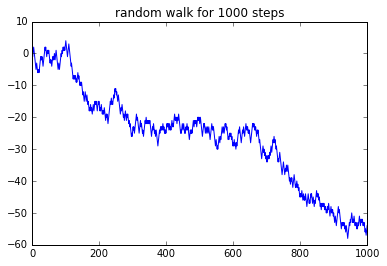

In [256]:
position = 0
walk = [position]
for i in range(1000):
    position=position+(-1)**(np.random.randint(-1,1))
    walk.append(position)
plt.title('random walk for 1000 steps')
plt.plot(walk)

In [257]:
walk = np.array(walk)
bol = np.where(np.abs(walk)>=10,True,False)
bol.argmax()

142